In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [88]:
# First Model
#  Number of each resource in initial placement vs points

In [96]:
# CSV - modified to rename columns
data = pd.read_csv('resources/model_data.csv')
data.columns

Index(['gameNum', 'player', 'points', 'win', '1_1_n', '1_1_r', '1_1_p',
       '1_1_rp', '1_2_n', '1_2_r', '1_2_p', '1_2_rp', '1_3_n', '1_3_r',
       '1_3_p', '1_3_rp', '2_1_n', '2_1_r', '2_1_p', '2_1_rp', '2_2_n',
       '2_2_r', '2_2_p', '2_2_rp', '2_3_n', '2_3_r', '2_3_p', '2_3_rp', 'L',
       'C', 'S', 'W', 'O', 'resource_pct', '3G', '2L', '2C', '2S', '2W', '2O',
       'has_port', 'D', '0.0278', '0.0556', '0.0833', '0.1111', '0.1389',
       'probability_score', 'probability_score_2'],
      dtype='object')

In [97]:
# Remove un-needed columns
data = data.drop(columns=['gameNum', 'player', 'win', '1_1_n', '1_1_r', '1_1_p',
       '1_1_rp', '1_2_n', '1_2_r', '1_2_p', '1_2_rp', '1_3_n', '1_3_r',
       '1_3_p', '1_3_rp', '2_1_n', '2_1_r', '2_1_p', '2_1_rp', '2_2_n',
       '2_2_r', '2_2_p', '2_2_rp', '2_3_n', '2_3_r', '2_3_p', '2_3_rp', 'resource_pct', '3G', '2L', '2C', '2S', '2W', '2O',
       'has_port', 'D', '0.0278', '0.0556', '0.0833', '0.1111', '0.1389',
       'probability_score', 'probability_score_2'
])


In [98]:
data

,points,L,C,S,W,O
0,5,2,2,0,1,1
1,9,1,0,1,2,2
2,10,0,1,3,1,1
3,5,4,0,1,0,1
4,10,1,0,0,2,2
...,...,...,...,...,...,...
199,8,1,1,2,1,1
200,3,1,1,1,1,1
201,6,1,0,1,2,2
202,6,0,2,1,1,1


In [99]:
# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)

'points'

In [103]:
X = data[columns]
y = data['points']

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X,y)

0.5588235294117647

In [106]:
importances = rf.feature_importances_
importances

array([0.19950572, 0.21236183, 0.21621369, 0.19894951, 0.17296926])

In [107]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.2162136856222266, 'S'),
 (0.21236182696705852, 'C'),
 (0.19950571798702693, 'L'),
 (0.19894951066469654, 'W'),
 (0.1729692587589914, 'O')]

In [108]:
##########################################################

In [109]:
# Second Model - Number of each probability vs points

In [132]:
# CSV - modified to rename columns
data = pd.read_csv('resources/model_data.csv')
data.columns

Index(['gameNum', 'player', 'points', 'win', '1_1_n', '1_1_r', '1_1_p',
       '1_1_rp', '1_2_n', '1_2_r', '1_2_p', '1_2_rp', '1_3_n', '1_3_r',
       '1_3_p', '1_3_rp', '2_1_n', '2_1_r', '2_1_p', '2_1_rp', '2_2_n',
       '2_2_r', '2_2_p', '2_2_rp', '2_3_n', '2_3_r', '2_3_p', '2_3_rp', 'L',
       'C', 'S', 'W', 'O', 'resource_pct', '3G', '2L', '2C', '2S', '2W', '2O',
       'has_port', 'D', '0.0278', '0.0556', '0.0833', '0.1111', '0.1389',
       'probability_score', 'probability_score_2'],
      dtype='object')

In [133]:
# Remove un-needed columns
data = data.drop(columns=['gameNum', 'player', 'win', '1_1_n', '1_1_r', '1_1_p',
       '1_1_rp', '1_2_n', '1_2_r', '1_2_p', '1_2_rp', '1_3_n', '1_3_r',
       '1_3_p', '1_3_rp', '2_1_n', '2_1_r', '2_1_p', '2_1_rp', '2_2_n',
       '2_2_r', '2_2_p', '2_2_rp', '2_3_n', '2_3_r', '2_3_p', '2_3_rp', 
       'L','C', 'S', 'W', 'O','resource_pct', '3G', '2L', '2C', '2S', '2W', '2O',
       'has_port', 'D', 'probability_score', 'probability_score_2'
])


In [134]:
data = data.rename(columns={'0.0278': '2,12','0.0556': '3,11','0.0833': '4,10', '0.1111': '5,9','0.1389':'6,8'})

In [135]:
data

,points,"2,12","3,11","4,10","5,9","6,8"
0,5,0,3,1,1,1
1,9,0,1,2,2,1
2,10,1,1,1,1,2
3,5,0,1,2,1,2
4,10,0,0,2,1,2
...,...,...,...,...,...,...
199,8,0,2,2,2,0
200,3,0,1,2,2,0
201,6,2,0,0,4,0
202,6,0,2,1,0,2


In [136]:
# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)

'points'

In [137]:
data

,points,"2,12","3,11","4,10","5,9","6,8"
0,5,0,3,1,1,1
1,9,0,1,2,2,1
2,10,1,1,1,1,2
3,5,0,1,2,1,2
4,10,0,0,2,1,2
...,...,...,...,...,...,...
199,8,0,2,2,2,0
200,3,0,1,2,2,0
201,6,2,0,0,4,0
202,6,0,2,1,0,2


In [138]:
X = data[columns]
y = data['points']

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X,y)

0.4852941176470588

In [141]:
importances = rf.feature_importances_
importances

array([0.10720933, 0.24256796, 0.24455459, 0.23841141, 0.1672567 ])

In [142]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.24455459259594792, '4,10'),
 (0.2425679645368915, '3,11'),
 (0.238411413805868, '5,9'),
 (0.16725670103480308, '6,8'),
 (0.10720932802648957, '2,12')]

In [29]:
# Assign X (data) and y (target)
X = data[columns]
y = data['points'].values.reshape(-1,1)
print(X.shape, y.shape)

(204, 5) (204, 1)


In [30]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [32]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [33]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

### END SOLUTION

In [34]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

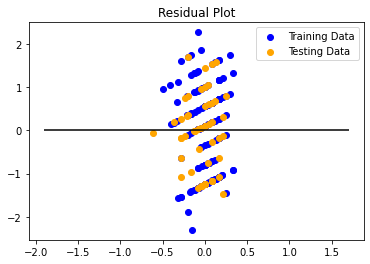

In [35]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [36]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.740126291089088, R2: 0.048611039745361295


In [38]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.780757784549585, R2: -0.003618363239489941
